In [1]:
import torch.utils.data as dt

from misc.processing import *
from misc.displaying import display
from misc.train import train_network
from misc.model_mp_v6 import SegmenterModel

In [2]:
DEVICE_ID = 3
DEVICE = torch.device('cuda:%d' % DEVICE_ID)
torch.cuda.set_device(DEVICE_ID)

In [3]:
train = './d_data/train/'
train_masks = './d_data/train_masks/'
test = './d_data/test/'
test_masks = './d_data/test_masks'

ds = CarvanaDataset(train, train_masks)
ds_test = CarvanaDataset(test, test_masks)
dl = dt.DataLoader(ds, shuffle=True, num_workers=4, batch_size=32)
dl_test = dt.DataLoader(ds_test, shuffle=False, num_workers=1, batch_size=32)

In [4]:
net = SegmenterModel()
schedule = {0:0.001, 80:0.0005, 100:0.00025}
full_loss_train, full_loss_test = train_network(net, dl, dl_test, n_epoch=120, schedule=schedule)

Learning rate:  0.001
Epoch: 0 | Train loss: 0.016616, Test loss: 0.018559
Epoch: 1 | Train loss: 0.013102, Test loss: 0.013434
Epoch: 2 | Train loss: 0.010380, Test loss: 0.009283
Epoch: 3 | Train loss: 0.008858, Test loss: 0.007873
Epoch: 4 | Train loss: 0.007734, Test loss: 0.007599
Epoch: 5 | Train loss: 0.006929, Test loss: 0.007372
Epoch: 6 | Train loss: 0.006180, Test loss: 0.005873
Epoch: 7 | Train loss: 0.005561, Test loss: 0.005562
Epoch: 8 | Train loss: 0.004410, Test loss: 0.003934
Epoch: 9 | Train loss: 0.003504, Test loss: 0.003443
Epoch: 10 | Train loss: 0.003334, Test loss: 0.003547
Epoch: 11 | Train loss: 0.003014, Test loss: 0.002907
Epoch: 12 | Train loss: 0.002752, Test loss: 0.002862
Epoch: 13 | Train loss: 0.002562, Test loss: 0.002537
Epoch: 14 | Train loss: 0.002481, Test loss: 0.002449
Epoch: 15 | Train loss: 0.002388, Test loss: 0.002272
Epoch: 16 | Train loss: 0.002269, Test loss: 0.002511
Epoch: 17 | Train loss: 0.002073, Test loss: 0.001962
Epoch: 18 | Trai

In [5]:
save_model(net, './models/model_mp_v6')
save_state(net, './models/state_mp_v6')

In [6]:
net = load_state(SegmenterModel, './models/state_mp_v6')
net.cuda()

SegmenterModel(
  (downsize): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (conv_h0): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (pool_h): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_m0): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (conv_m1): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (pool_m): MaxPool2d(kernel_size

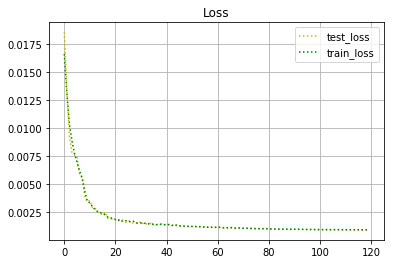

In [7]:
import matplotlib.pyplot as plt
plt.grid(True)
plt.title('Loss')
plt.plot(full_loss_test, 'y:', label = 'test_loss')
plt.plot(full_loss_train, 'g:', label = 'train_loss')
plt.legend()

### Результаты работы

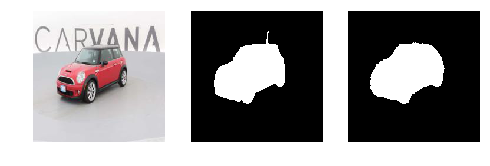

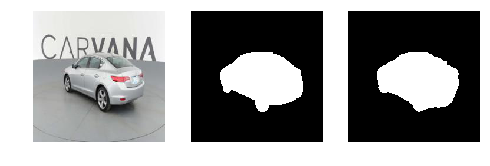

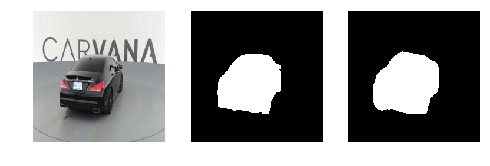

In [8]:
from random import randint
from torch.autograd import Variable

for _ in range(3):
    image, image_mask = ds_test[randint(0, 507)]

    input_ = Variable(image.unsqueeze_(0)).cuda()
    output = net(input_)

    image_mask_guess = class_max(output)
    display((image.squeeze_(0), image_mask, image_mask_guess), figsize=(8,24))